# Lección 1: Computación reversible y modelo de circuitos

Antes de adentrarnos en las nociones fundamentales de computación cuántica, vamos a revisar las ideas fundamentales de las ciencias de la computación. En particular, discutiremos el *modelo de computación de circuitos clásico*, y enfatizaremos en la importancia de la *computación reversible*. Esta lección es eminentemente teórica, sin embargo, puede ser tratada interactivamente en nuestro entorno de ejecución en MyBinder.

---

Para ilustrar la computación reversible, vamos a utilizar el paquete de Python *Qiskit*, desarrollado por IBM. El lector puede experimentar interactivamente en esta lección por medio de nuestro entorno virtual alojado en MyBinder. Solo debe hacer click en el siguiente botón.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DiegoHerrera262/QuantumComputing/master)

**NOTA:** Si el lector se encuentra examinando esta lección en nuestro servidor, debe ejecutar los siguientes comandos. En el ejemplo práctico explicaremos qué significan. En este punto, lo importante es la esencia conceptual. Recomendamos leer enteramente el post y luego experimentar con él interactivamente.

Este paquete se importa como cualquier otro paquete de Python. Por el momento, tan solo utilizaremos las funciones

* ```QuantumCircuit```: Permite declarar un circuito cuántico. Para efectos de esta lección, puede imaginarse que los bits de los circuitos corresponden a bits clásicos.
* ```QuantumRegister```: Permite declarar un registro cuántico. Para efectos de esta lección, puede imaginarse que los bits de estos registros son clásicos.
---

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

## Modelo de computación de circuitos

Un modelo de computación es un marco matemático preciso que permite condensar la noción de **algoritmo**. En computación clásica, existen dos modelos de computación de gran utilidad: **máquinas de Turing** y **circuitos lógicos**. Discutiremos brevemente el modelo de máquinas de Turing para introducir las **tesis fundamentales de Turing y Church**, y así motivar desde un punto de vista formal la necesidad de la computación cuántica. También introduciremos el modelo de circuitos lógicos y el uso de compuertas lógicas para calcular *funciones computables*.

### Máquinas de Turing

Si bien todos los estudiantes de ciencias de la computación pueden estar familiarizados con las temáticas de estas sección, proponemos una breve introducción para aquellos que provienen de contextos más enfocados hacia las ciencias físicas. Una máquina de Turing es un dispositivo compuesto por

1. Una **cinta infinita** con celdas donde se pueden escribir **símbolos** de un **alfabeto** definido
1. una **cabeza lectora móvil** capaz de leer y escribir símbolos en las celdas de la cinta.
1. Un **sistema de control** capaz de encontrase en un **estado** dentro de un un **conjunto de estados finitos**.
1. Un **programa** que determina las acciones que debe realizar la máquina según:
    * El estado actual del sistema de control
    * el símbolo que encuentre la cabeza lectora en la celda de la cinta a la que apunte.
    
Presentamos una representación gráfica de una máquina de Turing

![png](images/turingMach.png)

Como apuntan Nielsen y Chuang, esta máquina parece un computador primitivo en el cual la cinta hace el papel de la memoria, el sistema de control es como el procesador, y el programa es un primitiva versión de un lenguaje de programación, como Python. De acuerdo con las instrucciones del programa:

1. El sistema de control hace que la cabeza escriba un nuevo símbolo en la celda a la que apunta
1. El sistema de control hace que la cabeza se mueva hacia la izquierda (<-) o hacia la derecha (->)
1. El sistema de control cambia su estado.

Una instrucción de un programa para una máquina de Turing es de la forma $(Q_i,S_i) \rightarrow (Q_j,S_j,M)$, donde $Q$ denota un estado del sistema de control; $S$, un símbolo del alfabeto permitido; $M$ un movimiento de la cabeza permitido. Existe un estado especial denominado *estado de parada*, en el cual la máquina finaliza un cómputo. Si el lector desea experimentar más con máquinas de Turing, le remitimos a la excelente página de [Martin Utergate](https://turingmachinesimulator.com), donde podrá experimentar con un simulador online.

Siempre es posible simular una máquina de Turing utilizando una llamada **Máquina de Turing Universal**. Simplemente necesitamos encontrar una manera de *codificar* el programa de una máquina de Turing a simular, así como su alfabeto, de una manera que la Máquina de Turing Universal lo pueda entender y replicar. Esto se logra por medio de la definición del *número de Turing* de una máquina. Los detalles sobre este ingenioso algoritmo para definir una máquina de Turing Universal no se discuten en esta lección. Sin embargo, si apuntamos que las máquinas de Turing no tienen un alcance límitado dentro de su clase.

>La importancia de las máquinas de Turing es que pueden utilizarse para calcular cualquier función que pudiera ser considerada como computable por medio de un algoritmo. Esta afirmación se conoce como **la tesis de Church-Turing**.

La tesis de Curch-Turing establece que cualquier dispositivo físico puede ser simulado por un aparato con la arquitectura de una máquina de Turing. Incluso si este es un procesador cuántico. 

>En computación, la máquina de Turing es el modelo por excelencia que permite determinar si un problema puede ser resuelto por un computador físico o no.

### Modelo de circuitos lógicos

Este modelo de computación es equivalente al modelo de Máquina de Turing, sin embargo, se encuentra más cerca de la forma como los procesadores electrónicos actuales realizan cómputos.

>Un **circuito** está hecho de *cables* y *compuertas*. Los cables pueden encontrarse en alguno de dos estados posibles, notados genéricamente como 0 y 1. Por tanto, un cable codifica 1 **bit** de información. Las compuertas realizan operaciones lógicas sobre uno o varios cables, y permiten realizar cómputos.

Podemos pensar en un circuito como un dispositivo capaz de computar una función. Esta función se define dentro del espacio de cadenas binarias (cadenas de 0's y 1's) de longitud $n$ arbitrario, al espacio de cadenas binarias de longitud $l$ arbitraria. Matemáticamente, se dice que un circuito lógico computa una función binaria de la forma

$$f: \{0,1\}^{n} \rightarrow \{0,1\}^l$$

Donde $\{0,1\}^{n}$ el conjunto de todas las cadenas binarias de longitud $n$. Se dirá que estas cadenas son *de $n$ bits*. Por ejemplo, la cadena *1011* es una cadena binaria de 4 bits. Otra forma de notar este tipo de cadenas en forma genérica, y que se empleará en esta serie es

$$q_0q_1q_2 \cdots q_n$$

Donde $q_i$ denota el estado del $i$-ésimo bit de la cadena. Siguiendo con el ejemplo anterior, $q_2 = 1$. Las compuertas lógicas se usan para modifical el valor de los cables o bits de un circuito, con el fin de calcular una función binaria. Las compuertas más famosas son conocidas por todo amante de la lógica simbólica o el álgebra booleana. Se reproducen a continuación.

![png](images/logicGates.png)

Las compuertas AND y OR se denotan por símbolos especiales: $\land$ y $\lor$ respectivamente.

Estas compuertas son de la forma $f: \{0,1\}^{1} \rightarrow \{0,1\}^{1}$, excepto NOT. Otra compuerta importante es la COPY o FANOUT, que genera un caopia de un bit de un circuito:

$$\text{FANOUT}: q \rightarrow q,q$$

Esta no tiene una representación tan vistosa como las otras, pues consiste en desprender un cable de otro. Creemos que el lector puede imaginarse esta representación. 

>Las compuertas anteriores pueden utilizarase para computar cualquier función binaria. La prueba de este hecho requiere un *pensamiento recursivo*. El lector que desee una pista para convencerse de esta afirmación, puede consultar el libro de Nielsen y Chuang en computación cuántica.

Aquí, por ejemplo, incluimos un circuito que permite sumar dos números de un bit.

![png](images/bitAdder.png)

En muchos casos, para computar una función binaria es necesario utilizar cables o bits adicionales. Estos se denominan **bits de ancila**. Serán de particular importancia cuando discutamos la computación reversible.

**NOTA:** Un conjunto particular de cables o bits de un circuito suele denominarse genéricamente como *registro*. Así, por ejemplo, un conjunto de bits de ancila puede denominarse registro de ancila; o el conjunto de bits donde se registra la entrada de un programa puede denominarse registro de entrada.

### Complejidad computacional

Como apuntan Nielsen y Chuang, el análisis de un problema computacional depende de al menos 3 preguntas principales:

1. ¿Qué es un problema computacional?
1. ¿Cómo podemos diseñar un algoritmo para resolver un problema?
1. ¿Cuáles son los recursos mínimos requeridos para resolver un problema computacional?

Como primera aproximación, un científico de la computación se enfoca en el estudio de problemas que sean **decidibles**. Estos son problemas formulables como una pregunta tipo sí/no en sus entradas. Por ejemplo, el problema de determinar si una cadena binaria es palíndroma o no, es un problema decidible. El diseño de un algoritmo para resolver un problema decidible está marcado por la creatividad y el esfuerzo de muchos científicos e ingenieros. Los recursos que emplean estos algoritmos son cuantificados en términos de **tiempo** de ejecución, **espacio** de almacenamiento requerido, y **energía** empleada por un dispositivo físico para lelvar al cabo el algoritmo.

>La cantidad de recursos que necesita un circuito se mide en términos del número de bits que necesita (*espacio*), la profundidad o número de compuertas del circuito (*tiempo*) y la energía que necesita algún dispositivo (electrónico) para llevarlo a cabo.

La complejidad de un circuito depende del *tamaño de las cadenas* que recibe como entrada. Cuanto más grande la cadena, mayor es el número de recursos que necesita.

>Los recursos de los que dispone un algoritmo son limitados. Simpre es necesario hacer un compromiso entre energía, espacio y tiempo para tener una eficiencia óptima.

Los problemas denominados **tratables**, son aquellos en los que la cantidad de recursos que necesita un algoritmo para su ejecución no escala más rápidamente que una función polínomica del tamaño de las cadenas que recibe de entrada. Estos problemas pueden ser, por ejemplo, el ordenamiento de un arreglo, o la solución de un sistema de ecuaciones lineales, y se dice que son *eficientemente solubles*. De los muchos modelos de computación que se pueden proponer, una variación del modelo de máquina de Turing es considerado como el referente en eficiencia para la computación clásica. Este es el de máquinas de Turing probabilísticas, en la cual la ejecución de una instrucción de un programa depende "*del lanzamiento de una moneda*".

> La **Tesis Fuerte de Church-Turing** establece que cualquier modelo de computación puede ser simulado eficientemente por una máquina de Turing probabilística.

**IMPORTANTE:** Desde una perspectiva teórica, una de las motivaciones del cómputo por medio de sistemas cuánticos es que este puede representar un desafío para la tesis fuerte de Church-Turing. Es decir, que un porcesador cuántico puede resolver eficientemente problemas intratables con un sistema clásico.

## Computación reversible

Si bien es posible que el lector haya corrido un programa en su computador, tal vez en Python, es rara la ocasión en la que se ha preguntado por la intensidad de corriente que fluye a través del mismo cuando se encuentra procesando información. Es aún menos probable que haya reparado en la cantidad de energía que consume su computador cuando está realizando una tarea. Tal vez se ha cuestionado por qué la cuenta de la electricidad ha aumentado durante un periodo de tiempo dado. Landauer es uno de aquellos extraños individuos que se ha preguntado seriamente cuál es el costo energético de realizar un cómputo.

>El principio de Landauer establece que el coste energético de borrar un bit de información es al menos $k_B T \ln{2}$ unidades de energía. En español, esto significa que el coste de borrar un bit de información es porporcional a la temperatura a la cual se encuentra el procesador.

Por tanto, la manera más óptima, en términos de energía, para realizar un cómputo, es no borrar nunca un bit de información. En tal caso, la energía empleada sería nula. Pero, si es necesario procesar una cadena de bits para obtener una salida, ¿cómo podemos realizar este límite teórico ideal? La respuesta es que debemos realizar los cómputos reversiblemente. Esto suena familiar para los físicos que han visto algo de termodinámica. Vagamente, significa que al finalizar el cómputo, el estado de la cadena modificada debe ser igual al estado inicial, y que todos los cambios deben realizarse por medio de transformaciones muy lentas, que no involucren disipasión de calor. Para un científico de la computación, basta decir que las funciones computadas deben ser *invertibles*. Una computación reversible debe necesariamente computar una función binaria de la forma

$$f:\{0,1\}^{m} \rightarrow \{0,1\}^{m}$$

Como veremos a continuación, cualquier función puede ser computada reversiblemente con la ayuda de bits de ancila. Para ello, discutiremos algunas compuertas reversibles famosas, y cómo podemos utilizar bits de ancila para simular AND, OR, y FANOUT.

**IMPORTANTE:** El lector debe realizar que la compuerta NOT es reversible.

### Compuertas reversibles

Adelantamos que la computación cuántica es por naturaleza reversible. El modelo de circuitos cuánticos difiere fundamentalmente de un modelo de circuitos de computación reversible en que los cables representan **bits cuánticos**. En esta etapa no entraremos sobre las implicaciones del uso de **bits cuánticos o qubits** en un circuito. 

>Por el momento, es suficiente con reconocer que el modelo de cómputo por medio de circuitos reversibles es un caso particular del modelo de computación cuántica.

**IMPORTANTE:** Por convención, el estado inicial de los todos bits en un circuito lógico es 0. Así, antes de realizar cualquier cómputo, es posible asumir que el valor de bit de un cable en un circuito lógico es 0.

Por convención, denotaremos la acción de una compuerta $A$ sobre un registro con bits $q_0 \cdots q_n$ con $A(q_0 \cdots q_n) = q'_0 \cdots q'_n$.

#### Compuerta NOT

Esta compuerta ya la hemos visto anteriormente. Presentamos las líneas de código necesarias para utilizar esta compuerta con *Qiskit*.

**NOTA:** En computación cuántica, la compuerta NOT se denota con $X$

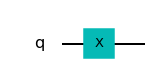

In [13]:
## La compuerta actúa sobre un registro de un bit
registro = QuantumRegister(1,name='q')
## Debemos inicializar nuestro circuito con el registro
circuito = QuantumCircuit(registro)
## Insertamos una compuerta SWAP en el circuito
circuito.x(registro)
## Dibujamos el circuito
circuito.draw(output='mpl')

#### Compuerta SWAP

Esta compuerta intercambia el valor del bit de dos cables. Para usarla en *Qsikit* se deben ejecutar los siguientes comandos.

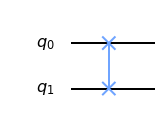

In [14]:
## La compuerta actúa sobre un registro de dos bits
registro = QuantumRegister(2,name='q')
## Debemos inicializar nuestro circuito con el registro
circuito = QuantumCircuit(registro)
## Insertamos una compuerta SWAP en el circuito
## Los bits de un registro se acceden como los elementos de una lista en Python
## ingresamos los bits en orden: bit1, bit2
circuito.swap(registro[0],registro[1])
## Dibujamos el circuito
circuito.draw(output='mpl')

La acción de esta compuerta se resume con

$$\text{SWAP}(q_0q_1) = q_1q_0$$

#### Compuerta de Fredkin o CSWAP

Esta es una compuerta de tres bits. Se constituye por un bit denominado control ($q_0$), y un par de bits denominados objetivos ($q_1$ y $q_2$). La acción de una compuerta de Fredkin se resume de la siguiente forma

$$\text{CSWAP}(q_0q_1q_2) = \begin{cases}q_0q_1q_2 & q_0 = 0 \\ q_0q_2q_1 & q_0 = 1\end{cases}$$

Nótese que la compuerta es equivalente a una aplicación de la compuerta SWAP sobre los bits objetivo si el bit de control está en estado 1. En caso contrario, no se realiza ninguna transformación a la cadena. 

>Esta compuerta es de vital importancia puesto que es suficiente para computar cualquier función binaria reversible. La prueba de este hecho puede encontrarse en los libros de Nielsen y Chuang o Beneti, Casati y Strini.

Presentamos al lector la forma de utilizar la compuerta CSWAP con *Qiskit*.

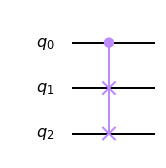

In [11]:
## La compuerta actúa sobre un registro de tres bits
registro = QuantumRegister(3,name='q')
## Debemos inicializar nuestro circuito con el registro
circuito = QuantumCircuit(registro)
## Insertamos una compuerta SWAP en el circuito
## el bit de un registro se accede como un elemento de una lista en Python
## bit de control: registro[0]
## bits de objetivo: registro[1], registro[2]
## Insertamos los bits en el orden: control, objetivo1, objetivo2
circuito.cswap(registro[0],registro[1],registro[2])
## Dibujamos el circuito
circuito.draw(output='mpl')

Y también una forma de simular la compuerta OR. Si el registro a la entrada tiene la cadena $q_0q_1q_2$, con $q_2 = 1$, entonces la cadena de salida $\text{CSWAP}(q_0q_1q_2) = q'_0q'_1q'_2$ es tal que $q'_1 = q_0 \lor q_1$. ¿Puede el lector inferir qué función se computa en el bit $q'_2$?

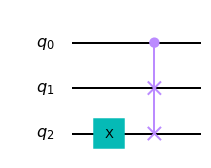

In [12]:
## Circuito para simular una compuerta OR por medio de una compuerta CSWAP
## La compuerta actúa sobre un registro de tres bits
registro = QuantumRegister(3,name='q')
## Debemos inicializar nuestro circuito con el registro
circuito = QuantumCircuit(registro)
## Debemos voltear el valor del bit q_2 pues por defecto se inicializa en 0
circuito.x(registro[2])
## Insertamos una compuerta SWAP en el circuito
circuito.cswap(registro[0],registro[1],registro[2])
## Dibujamos el circuito
circuito.draw(output='mpl')

#### Compuerta CNOT

Al igual que la compuerta de Fredkin, la compuerta CNOT es una compuerta controlada que actúa sobre 2 bits: un bit de control, y otro objetivo. Si el bit de control se denota por $q_0$, y el de objetivo por $q_1$, entonces

$$\text{CNOT}(q_0q_1) = \begin{cases}q_0q_1 & q_0 = 0 \\ q_0, \text{NOT } q_1 & q_0 = 1\end{cases}$$

Es decir, si el bit de control se encuentra en estado 1, se aplica una compuerta NOT sobre el bit de objetivo. Presentamos las líneas de código que permiten utilizar una compuerta CNOT con *Qiskit*.

**SUPER IMPORTANTE:** La acción de una compuerta CNOT se resume por la acción $\text{CNOT}(q_0q_1) = q'_0q'_1$ donde $q'_0 = q_0$ y $q'_1 = q_0 \oplus q_1$. Siendo equivalente $q_0 \oplus q_1$ a $q_0$ XOR $q_1$. Por esto también se conoce como *XOR reversible*

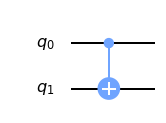

In [16]:
## La compuerta actúa sobre un registro de dos bits
registro = QuantumRegister(2,name='q')
## Debemos inicializar nuestro circuito con el registro
circuito = QuantumCircuit(registro)
## Insertamos una compuerta SWAP en el circuito
## bit de control: registro[0]
## bit objetivo: registro[1]
circuito.cx(registro[0],registro[1])
## Dibujamos el circuito
circuito.draw(output='mpl')

La compuerta CNOT nos permite copiar el valor del bit $q_0$ en el bit $q_1$, siempre que este último se inicialice con el valor 0. Este principio será de gran importancia más adelante.

### Compuerta Toffoli

Esta es una compuerta cuya acción se resume como una compuerta CNOT controlada. Por ello también suele denotarse como CCNOT. Su acción se resume por

$$\text{CCNOT}(q_0q_1q_2) = \begin{cases}q_0q_1q_2 & q_0 = 0 \\ q_0, \text{CNOT} (q_1,q_2) & q_0 = 1\end{cases}$$

**IMPORTANTE:** Se deja como ejercicio al lector demostrar que la acción de la compuerta Toffoli puede resumirse por $CCNOT(q_0q_1q_2) = q'_0q'_1q'_2$ con $q'_0 = q_0$, $q'_1=q_1$ y 

$$q'_2 = q_2 \oplus q_0q_1$$

Donde $q_0q_1$ equivale a $q_0$ AND $q_1$. Es por esto que la compuerta Toffoli tambien suele denominarse como AND reversible.

Se dice que los bits $q_0$ y $q_1$ son los bits de control, mientra que $q_2$ es el bit objetivo. A copntinuación presentamos las líneas de código que permiten utilizar la copuerta Toffoli dentro del paquete *Qiskit*.

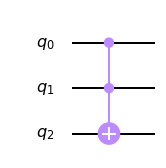

In [18]:
## La compuerta actúa sobre un registro de tres bits
registro = QuantumRegister(3,name='q')
## Debemos inicializar nuestro circuito con el registro
circuito = QuantumCircuit(registro)
## Insertamos una compuerta CCNOT en el circuito
## el bit de un registro se accede como un elemento de una lista en Python
## bits de control: registro[0], registro[1]
## bits de objetivo: registro[2]
## Insertamos los bits en el orden: control1, control2, objetivo
circuito.ccx(registro[0],registro[1],registro[2])
## Dibujamos el circuito
circuito.draw(output='mpl')

Estamos capacitados para estudiar un ejemplo sencillo. Supongamos que deseamos computar la función

$$f: q_0q_1q_2q_3 \rightarrow q_0 \land q_1 \land q_2 \land q_3$$